In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Live.csv')
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
data['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [7]:
data['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [8]:
len(data['status_id'].unique())

6997

In [9]:

len(data['status_published'].unique())

6913

In [10]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [11]:
data.drop(['status_id', 'status_published'], axis=1, inplace=True)
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [12]:
data.dtypes

status_type      object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [13]:
le = LabelEncoder()
data['status_type'] = le.fit_transform(data['status_type'])
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


In [15]:
data['status_type'] = data['status_type'].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


<Axes: >

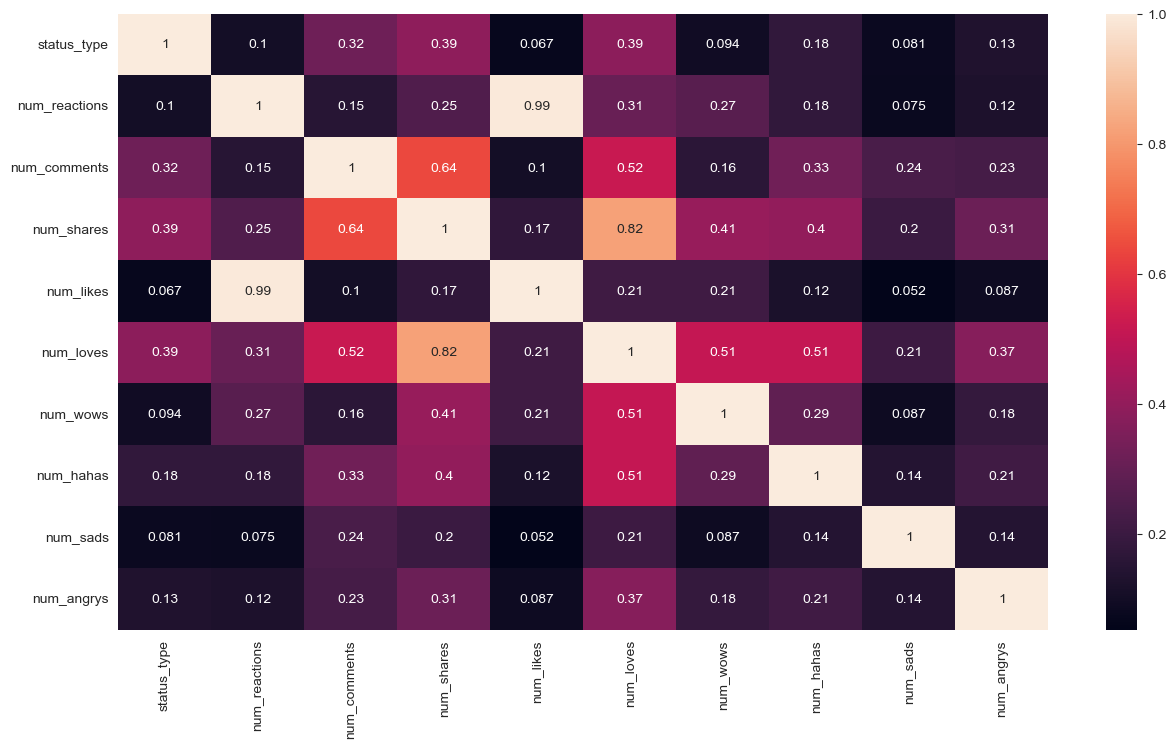

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True)

<Axes: >

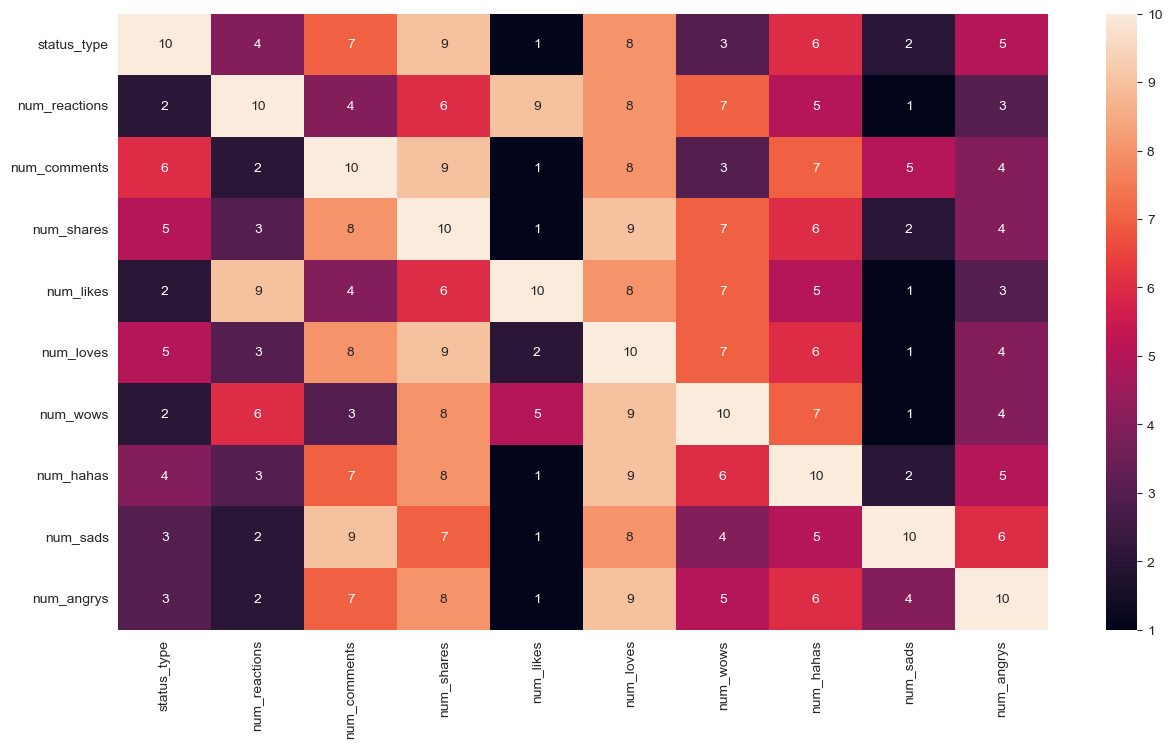

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr().rank(axis='columns'), annot=True)

In [18]:
sc = StandardScaler()
numerical = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
scaled_data = data.copy()

for i in numerical:
    scaled_data[i] = sc.fit_transform(data[[i]])

In [19]:
scaled_data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,1,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,1,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...,...
7045,1,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,1,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,1,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,1,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


<Axes: xlabel='num_reactions', ylabel='num_comments'>

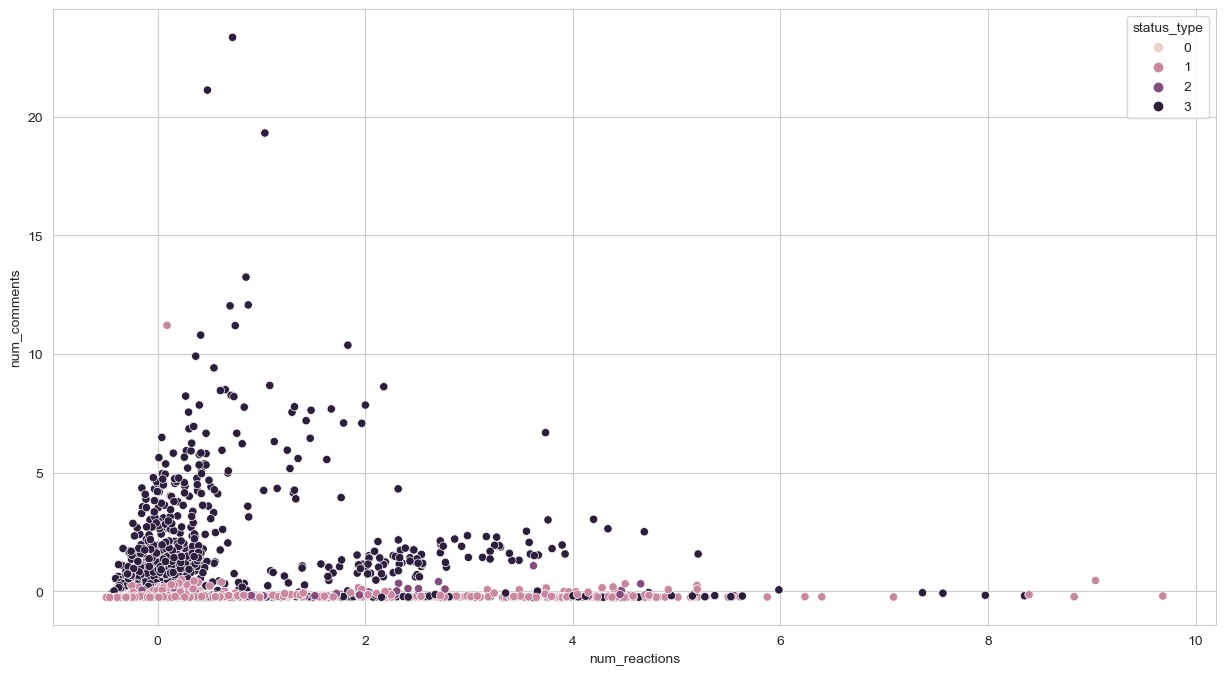

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=scaled_data, x='num_reactions', y='num_comments', hue='status_type')

<Axes: xlabel='num_shares', ylabel='num_comments'>

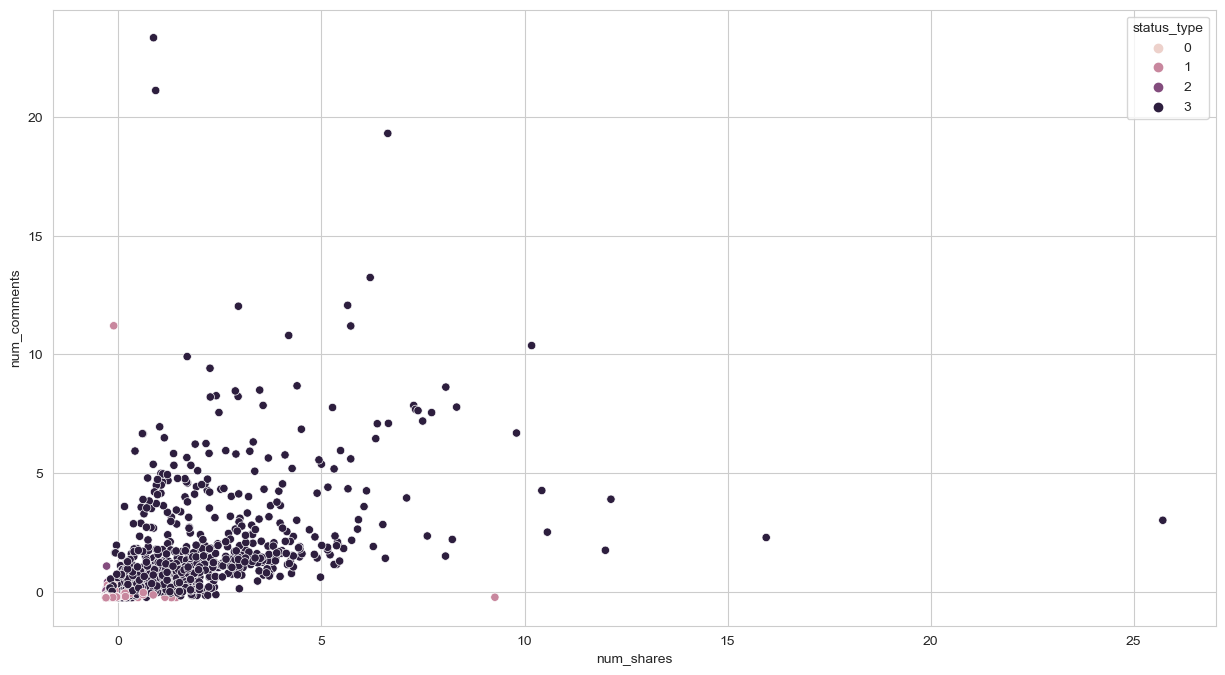

In [21]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=scaled_data, x='num_shares', y='num_comments', hue='status_type')

PCA with all Components

In [22]:
X = scaled_data.drop('status_type', axis=1)
y = scaled_data['status_type']

In [23]:
pca = PCA(n_components=None)
pca.fit(X)

PCA()

In [24]:
pca.explained_variance_ratio_

array([3.83266304e-01, 1.92897934e-01, 1.07214103e-01, 9.27523060e-02,
       8.80720525e-02, 7.69457309e-02, 4.22670323e-02, 1.65845346e-02,
       1.83131345e-09])

In [25]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

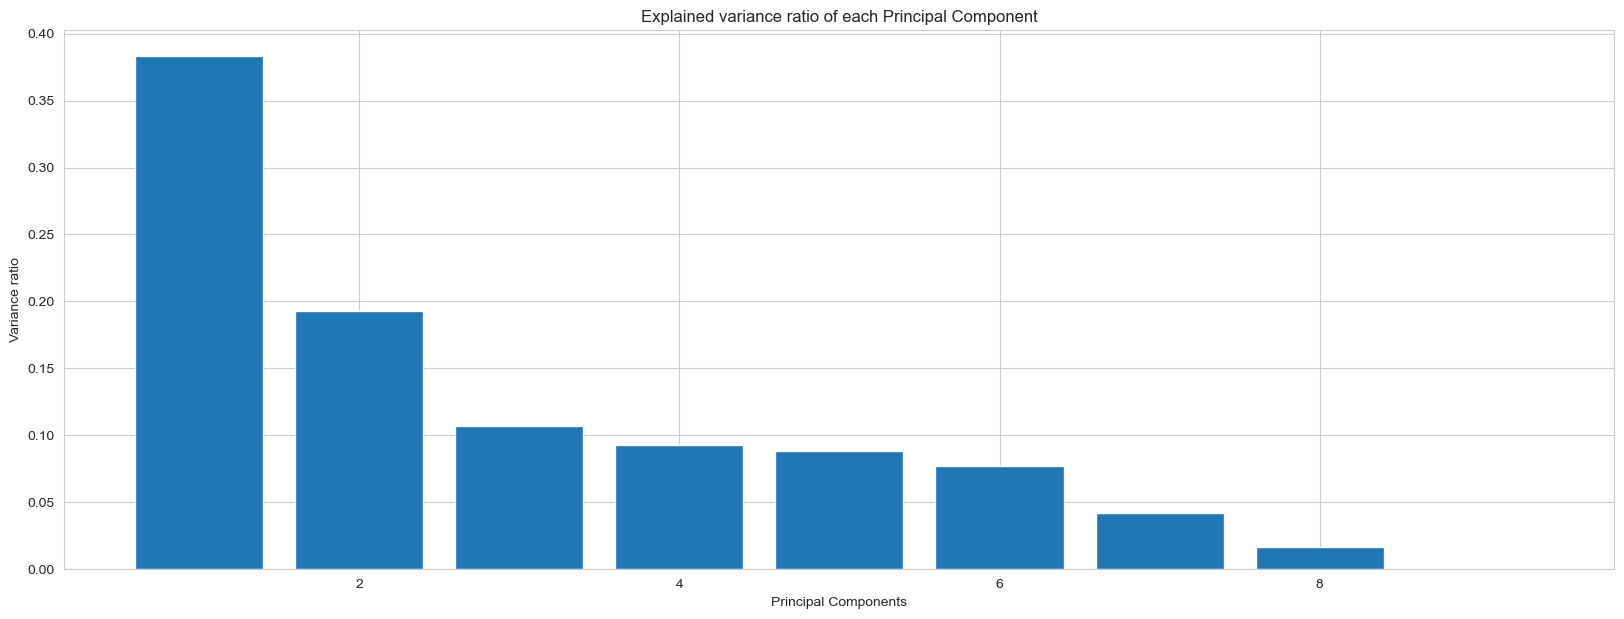

In [26]:
plt.figure(figsize=(20, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, label='Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Variance ratio')
plt.title('Explained variance ratio of each Principal Component')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

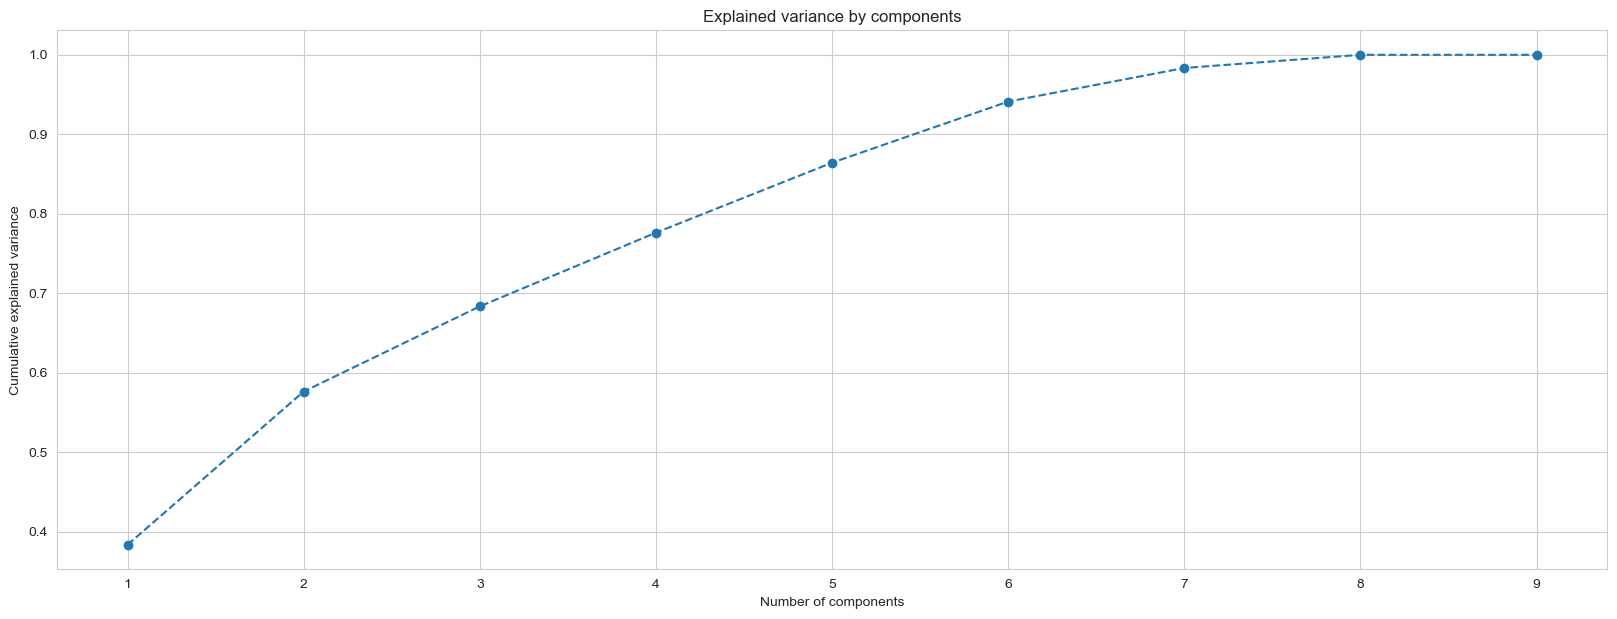

In [27]:
plt.figure(figsize=(20, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [28]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [29]:
scores_pca = pca.transform(X)

In [30]:
wcss = []

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

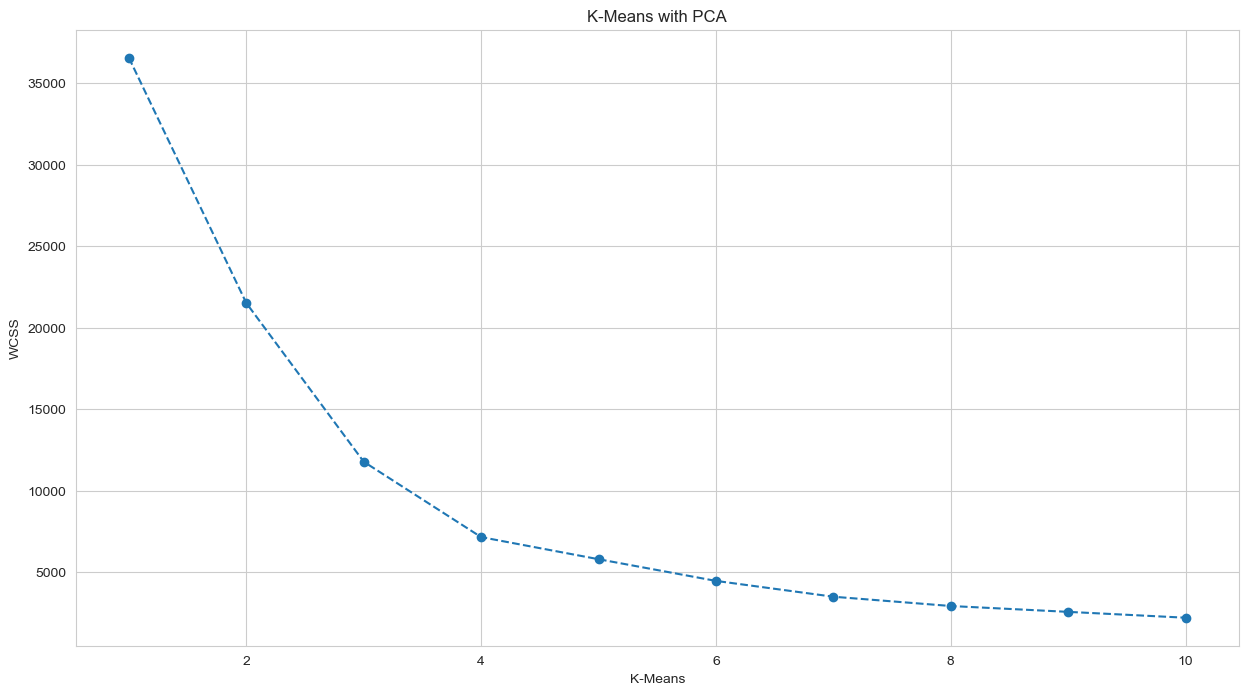

In [31]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('K-Means with PCA')
plt.xlabel('K-Means')
plt.ylabel('WCSS')
plt.show()

In [32]:
for i in range (1, len(wcss)+1):
    print(f'KMeans with {i} clusters has WCSS of {wcss[i-1]}')

KMeans with 1 clusters has WCSS of 36557.62092798896
KMeans with 2 clusters has WCSS of 21512.293555191005
KMeans with 3 clusters has WCSS of 11777.677909777714
KMeans with 4 clusters has WCSS of 7154.202649267675
KMeans with 5 clusters has WCSS of 5797.705176909376
KMeans with 6 clusters has WCSS of 4467.567685703173
KMeans with 7 clusters has WCSS of 3497.038972242699
KMeans with 8 clusters has WCSS of 2927.317337634753
KMeans with 9 clusters has WCSS of 2568.225588091858
KMeans with 10 clusters has WCSS of 2209.0840579810956


In [33]:
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=0)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=0)

In [34]:
kmeans_pca.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
df = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,0,1
0,3,529,512,262,432,92,3,1,1,0,2.255817,-0.122109
1,1,150,0,0,150,0,0,0,0,0,-0.632921,0.047366
2,3,227,236,57,204,21,1,1,0,0,0.100804,-0.057427
3,1,111,0,0,111,0,0,0,0,0,-0.682104,-0.061251
4,1,213,0,0,204,9,0,0,0,0,-0.453211,0.170515
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,-0.709849,-0.122522
7046,1,16,0,0,14,1,0,1,0,0,-0.710462,-0.371228
7047,1,2,0,0,1,1,0,0,0,0,-0.808425,-0.370634
7048,1,351,12,22,349,2,0,0,0,0,-0.277459,0.556486


In [36]:
df = df.rename(columns={0: 'component 1', 1: 'component 2'})
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,component 1,component 2
0,3,529,512,262,432,92,3,1,1,0,2.255817,-0.122109
1,1,150,0,0,150,0,0,0,0,0,-0.632921,0.047366
2,3,227,236,57,204,21,1,1,0,0,0.100804,-0.057427
3,1,111,0,0,111,0,0,0,0,0,-0.682104,-0.061251
4,1,213,0,0,204,9,0,0,0,0,-0.453211,0.170515
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,-0.709849,-0.122522
7046,1,16,0,0,14,1,0,1,0,0,-0.710462,-0.371228
7047,1,2,0,0,1,1,0,0,0,0,-0.808425,-0.370634
7048,1,351,12,22,349,2,0,0,0,0,-0.277459,0.556486


In [37]:
df['cluster'] = kmeans_pca.labels_
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,component 1,component 2,cluster
0,3,529,512,262,432,92,3,1,1,0,2.255817,-0.122109,0
1,1,150,0,0,150,0,0,0,0,0,-0.632921,0.047366,0
2,3,227,236,57,204,21,1,1,0,0,0.100804,-0.057427,0
3,1,111,0,0,111,0,0,0,0,0,-0.682104,-0.061251,0
4,1,213,0,0,204,9,0,0,0,0,-0.453211,0.170515,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,-0.709849,-0.122522,0
7046,1,16,0,0,14,1,0,1,0,0,-0.710462,-0.371228,0
7047,1,2,0,0,1,1,0,0,0,0,-0.808425,-0.370634,0
7048,1,351,12,22,349,2,0,0,0,0,-0.277459,0.556486,0


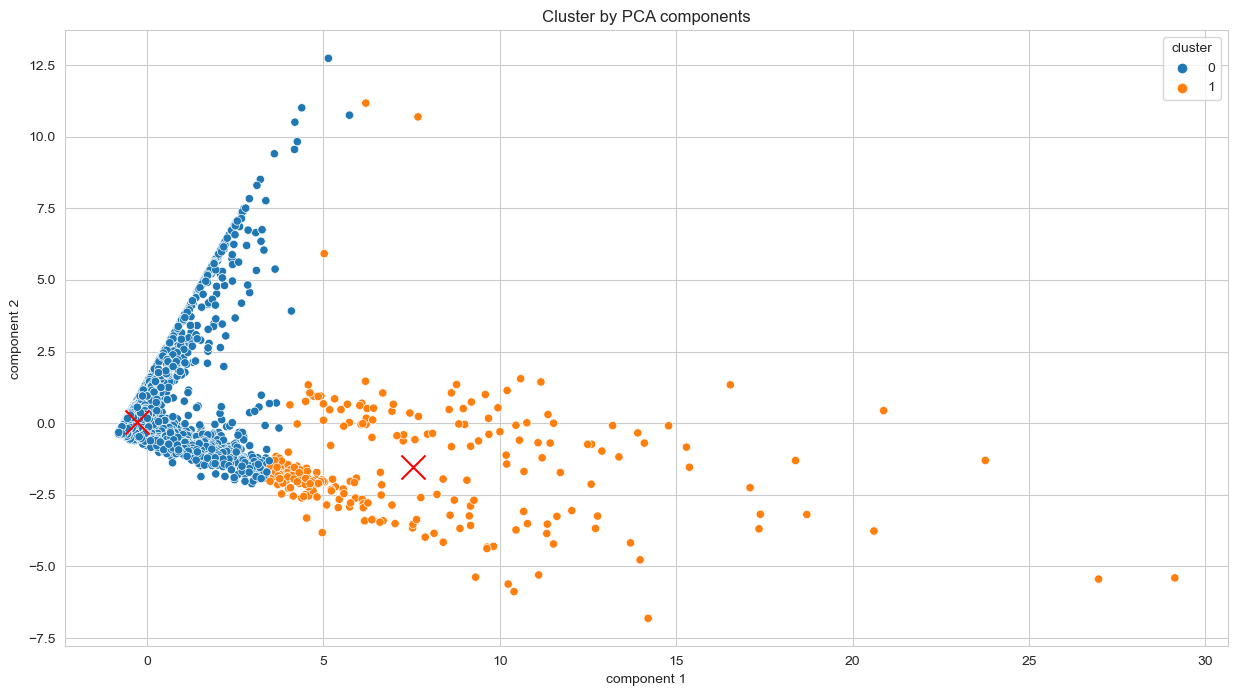

In [38]:
component1 = df['component 1'].values
component2 = df['component 2'].values

plt.figure(figsize=(15, 8))
sns.scatterplot(x=component1, y=component2, hue=df['cluster'])
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('Cluster by PCA components')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [39]:
y = data['status_type']
count_true = sum(y == kmeans_pca.labels_)
print(f'Accuracy: {count_true/float(y.size)}')

Accuracy: 0.011347517730496455


In [40]:
print("Result: %d out of %d samples were correctly labeled." % (count_true, y.size))

Result: 80 out of 7050 samples were correctly labeled.
